## **Principal Component Analysis(PCA)**

* Principal Component Analysis (PCA) is a statistical technique used in machine learning and data science for dimensionality reduction while preserving as much variability as possible in the data. 

* It is an unsupervised algorithm.

* By transforming the original variables into a new set of uncorrelated variables (principal components), PCA helps in simplifying the complexity of high-dimensional datasets, making them easier to visualize and analyze.

* Principal component analysis (PCA) reduces the number of dimensions in large datasets to principal components that retain most of the original information. 

* Principal components are linear combinations of the original variables that have the maximum variance compared to other linear combinations. 

**Motivation Behind PCA**

1. Dimensionality Reduction: Reduce the number of variables in the dataset while retaining most of the original information.

2. Data Visualization: Simplify data visualization in 2D or 3D space.

3. Noise Reduction: Remove noise and redundant information from the data.

4. Feature Extraction: Identify and extract important features that contribute to the variance in the data.

### **Understanding PCA Surfacely**

<center>
    <img src="../assets/pca.png"/>
</center>

* We can understand the concept of PCA using scatterplot of data.

* In the given figure above, X and Y are the features in original space (There are only two features for now, in general number of features will be higher). 

* The goal of PCA is to map the features X and Y into another new feature space which will give us new set of features but most of the original information or variance of dataset will be preserved.

* Before mapping the features to new feature space, at first we will compute the principal components and use those principal components to map the features from original space to new feature space.

* Since we have 2 features now, there will be 2 principal components.

* The first principal component (PC1) is the direction in space along which the data points have the highest or most variance. It is the line that best represents the shape of the projected points. The larger the variability captured in the first component, the larger the information retained from the original dataset. No other principal component can have a higher variability.

* We calculate the second principal component (PC2) in the same way as PC1. PC2 accounts for the next highest variance in the dataset and must be uncorrelated with PC1. That is, PC2 must be orthogonal, that is perpendicular, to PC1. This relationship can also be expressed as the correlation between PC1 and PC2 equals zero. 



### **PCA Algorithm: Step-by-Step Mathematical Explanation**

#### 1. Create a Dummy Dataset for illustration purpose

Assume we have a dataset $X$ with $n$ observations and 2 features. For simplicity, let's assume $X$ looks like this:

$$
X = \begin{bmatrix} 
x_{11} & x_{12} \\ 
x_{21} & x_{22} \\ 
\vdots & \vdots \\ 
x_{n1} & x_{n2} 
\end{bmatrix} 
$$

#### 2. Standardize the Data

Standardize the dataset to have zero mean and unit variance. This is done for each feature $j$:

$$
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j} 
$$

where:
- $ \mu_j $ is the mean of feature $j$
- $\sigma_j$ is the standard deviation of feature $j$

The standardized dataset $Z$ will look like:

$$
Z = \begin{bmatrix} 
z_{11} & z_{12} \\ 
z_{21} & z_{22} \\ 
\vdots & \vdots \\ 
z_{n1} & z_{n2} 
\end{bmatrix} 
$$

#### 3. Compute the Covariance Matrix

Calculate the covariance matrix $\Sigma$ of the standardized data $Z$:

$$
\Sigma = \frac{1}{n-1} Z^T Z 
$$

The covariance matrix $\Sigma$ for a 2-feature dataset will be a $ 2 \times 2$ matrix:

$$
\Sigma = \begin{bmatrix} 
\text{Var}(z_1) & \text{Cov}(z_1, z_2) \\ 
\text{Cov}(z_1, z_2) & \text{Var}(z_2) 
\end{bmatrix} 
$$

#### 4. Compute Eigenvalues and Eigenvectors

Find the eigenvalues and eigenvectors of the covariance matrix $\Sigma$. 

Eigenvalues $\lambda$ and eigenvectors $v$ satisfy the equation:

$$
\Sigma v = \lambda v 
$$

For our $ 2 \times 2$ covariance matrix, we will get two eigenvalues $\lambda_1$ and $\lambda_2$, and two corresponding eigenvectors $v_1$ and $v_2$.

#### 5. Sort Eigenvalues and Eigenvectors

Sort the eigenvalues in descending order. The eigenvector associated with the largest eigenvalue is the first principal component, and the eigenvector associated with the second largest eigenvalue is the second principal component.

Assume $\lambda_1 > \lambda_2$. Then:

$$
v_1 \rightarrow \text{First Principal Component} 
$$
$$
v_2 \rightarrow \text{Second Principal Component} 
$$

#### 6. Form the Principal Components

The principal components are linear combinations of the original features. Project the original data $Z$ onto the new feature space defined by the principal components.

The transformation matrix $W$ is formed by stacking the eigenvectors $ v_1$ and $v_2$:

$$
W = \begin{bmatrix} 
v_1 & v_2 
\end{bmatrix} 
$$

The dimension of transformation matrix $W$ is ($d \times k$) where $d$ is the number of original features and $k$ is the number of principal components we are retaining. In this case we are retaining both so k=2.

Project the standardized data $Z$ onto the principal components to obtain the transformed data $Y$:

$$
Y = Z W 
$$

#### 7. Resulting Transformed Data

The resulting dataset $Y$ in the new feature space defined by the principal components will look like:

$$
Y = \begin{bmatrix} 
y_{11} & y_{12} \\ 
y_{21} & y_{22} \\ 
\vdots & \vdots \\ 
y_{n1} & y_{n2} 
\end{bmatrix} 
$$

Here, each row represents an observation in the new coordinate system defined by the principal components, with $y_{i1}$and $y_{i2}$ being the scores of the first and second principal components, respectively.



**PCA Implementation**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

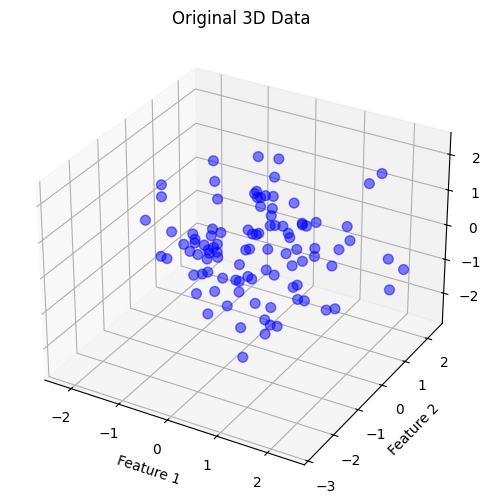

In [29]:
# Generate a dummy 3D dataset
np.random.seed(0)
X = np.random.randn(100, 3) # 100 samples, 3 features

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])

# Plot the original data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Feature 1'], df['Feature 2'], df['Feature 3'], s=50, c='b', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Original 3D Data')
plt.show()

In [30]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Apply PCA
pca = PCA(n_components=2)
transformed_features = pca.fit_transform(X_scaled)

Explained variance: [0.3817164 0.326309 ]
Total explained variance: 0.7080253965065239


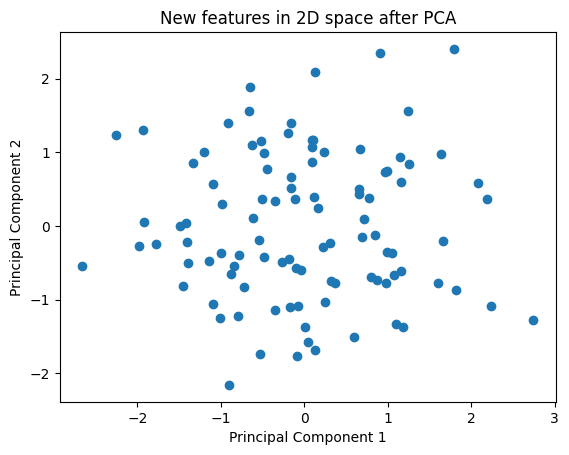

In [35]:
# Convert the principal components to a DataFrame
df_pca = pd.DataFrame(transformed_features, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance: {explained_variance}')

print(f'Total explained variance: {explained_variance.sum()}')

# Plot the principal components
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('New features in 2D space after PCA')
plt.show()